In [1]:
from datasets import list_datasets



In [2]:
all_datasets=list_datasets()
print(f"There are {len(all_datasets)} datasets currently avaiable")
print(f"The first 10 are: {all_datasets[:10]}")



There are 14039 datasets currently avaiable
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
from datasets import load_dataset

emotions=load_dataset('emotion')



Found cached dataset emotion (/Users/joesh/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
"""we see it is a dictioaney with a train, validation and test dataset"""
emotions



DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds=emotions['train']
train_ds[0]
"""values are the tweet and the emotion."""
#train_ds.column_names

'values are the tweet and the emotion.'

In [6]:
print(train_ds.features)
train_ds['text'][:5]




{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [7]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])




Using custom data configuration default-88a3a10ec1a82da2
Found cached dataset csv (/Users/joesh/.cache/huggingface/datasets/csv/default-88a3a10ec1a82da2/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
import pandas as pd

"""set fornmat allows us to change the output format of a dataset. Thia doesnt change the underlying data format
which is an arrow table."""

emotions.set_format(type="pandas")

In [9]:
df=emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [10]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [11]:
df["label_name"]=df["label"].apply(label_int2str)
#emotions["train"].features["label"]

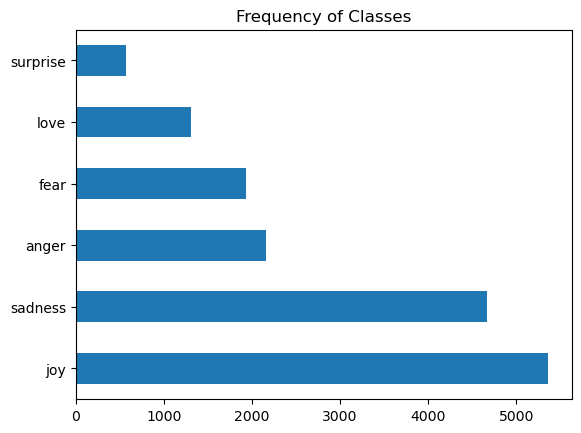

In [12]:
"""when working on a text classification problem it is a good idea to examine the distribution of examples
across the classes"""

import matplotlib.pyplot as plt

"""we see the dataset is heavily imbalanced"""
df["label_name"].value_counts(ascending=False).plot.barh()
plt.title("Frequency of Classes")
plt.show()

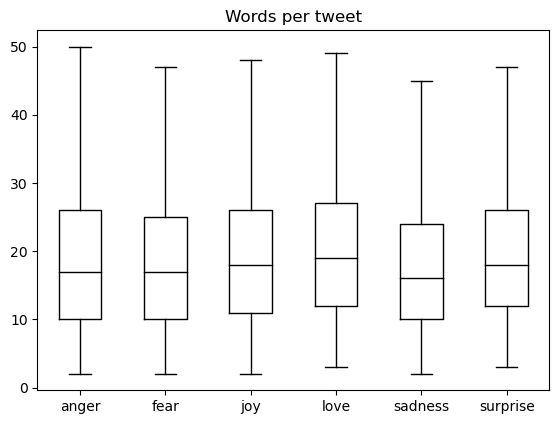

In [13]:
"""Transformer models have a maximum input sequence length that is referred to as the maximum context size. 
DistilBERT the maximum content is 512 tokens"""

df["Words per tweet"]=df["text"].str.split().apply(len)

df.boxplot("Words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")

"""tweets predominately around 15 words long"""
plt.show()

In [14]:
"""convert format into something with a suitability for Transformers"""
emotions.reset_format()

In [15]:
"""character tokenization"""
text="Tokenizing text is a core aspect of NLP"
tokenized_test=list(text)
#print(tokenized_test)
"""model expects each character to converted into an integer"""
token2idx={ch:indx for indx, ch in enumerate(sorted(set(tokenized_test)))}

In [16]:
input_ids=[token2idx[token] for token in tokenized_test]
"""the last step is to convert input_ids to a 2D tensor of one hot vectors"""
print(input_ids)
"""EXAMPLE"""

categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
pd.get_dummies(categorical_df["Name"])
categorical_df

[4, 13, 11, 7, 12, 10, 19, 10, 12, 9, 0, 17, 7, 18, 17, 0, 10, 16, 0, 5, 0, 6, 13, 15, 7, 0, 5, 16, 14, 7, 6, 17, 0, 13, 8, 0, 2, 1, 3]


,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [17]:
import torch
"""can create one-hot encodings in pytorch by converting input_ids to a tensor and applying one hot function as follows"""
import torch.nn.functional as F


In [18]:
input_ids=torch.tensor(input_ids) #convert input ids to a tensor

one_hot_codings=F.one_hot(input_ids, num_classes=len(token2idx) )
"""import to set the number of classes in one hot because the one hot vectors may end up shorter than the 
length of the vocabulary"""
one_hot_codings.shape


torch.Size([39, 20])

In [20]:
print(f"Token: {tokenized_test[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One hot: {one_hot_codings[0]}")

Token: T
Tensor index: 4
One hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [22]:
tokenized_text_2=text.split()
print(tokenized_text_2)

['Tokenizing', 'text', 'is', 'a', 'core', 'aspect', 'of', 'NLP']


In [31]:
Token2Idx={word:index for index,word in enumerate(sorted(set(tokenized_text_2)))}
Token2Idx["text"]

7

In [33]:
input_ids2=[Token2Idx[token] for token in tokenized_text_2]
input_ids2=torch.tensor(input_ids2)
one_hot_codings2=F.one_hot(input_ids2, num_classes=len(tokenized_text_2))

In [53]:
#subword tokenization
from transformers import AutoTokenizer
model_ckpt="distilbert-base-uncased"
#load tokenizer associated with pre-trained model
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

In [54]:
#from transformers import DistilBertTokenizer

#distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
encoded_text=tokenizer(text)
print(encoded_text)
#words mapped to unqiue integers in the input id field. Discuss attention mask in the following section


{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 7814, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [55]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [56]:
print(tokens)
#cls and sep tokens indicate the start and end of sequence. Each token has been lowercased. We can see 
#tokenizing and NLP have been split into two tokens. # in p and izing means preceding characters are not whitespace
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'aspect', 'of', 'nl', '##p', '[SEP]']
[CLS] tokenizing text is a core aspect of nlp [SEP]


In [57]:
#tokenizer("filter")
tokenizer.vocab_size
tokenizer.model_max_length
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [59]:
#Tokenizing an entire dataset

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)
#padding will pad examples with zeros to the size of the longest one in the batch and truncation=True will truncate 
#examples to the model's maximum context size. 

print(tokenize(emotions["train"][:2]))
#includes cla and sep tokens we encountered previously
#returns attention mask arrays. dont want the model to become confused by adding additional padding tokens. 
#attention mask allows the model to ignore padded parts of input›

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [60]:
emotions_encoded=emotions.map(tokenize, batched=True,batch_size=0 )
#map operates on every individual example in the corpusso setting batched=true will encode the tweets in batches
#since batch size =none encode our tweets in a single batch ensuring input tensors and attention mask have the same
#shape globall

print(emotions_encoded["train"].column_names)

Parameter 'function'=<function tokenize at 0x17e0348b0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask']


In [63]:
#emotions_encoded["train"][:]

#later chapters explore how data collators cna be used to dynamically pad tensors in each patch

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too',
  'i feel like i have to make the suffering i m seeing mean something',
  'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
  'i think it s the easiest time of year to feel dissatisfied',
  'i feel low 

In [65]:
#Transformers as feautre extractors

from transformers import AutoModel
model_ckpt="distilbert-base-uncased"
#cuda parallel computing platform enabling software to use certain types of GPUs for general purpose proceesig
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)


In [68]:
torch.cuda.is_available()

False